# **Predicting Job Salaries Based on Experience, Employment Type, and Geographic Data Using Machine Learning Models**

# **Submitted by: M ABBAS**

## Table of Contents

1. [Introduction](#introduction)
    
2. [Objectives](#objectives)
    
3. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
    
   - 3.1 - [Handling Missing Values](#handling-missing-values)  
   - 3.2 - [Removing Duplicates](#removing-duplicates)
       
4. [Exploratory Data Analysis](#exploratory-data-analysis)
    
5. [Correlation Analysis](#correlation-analysis)

6. [Feature Engineering](#feature-engineering)
    
   - 6.1 - [Feature Encoding](#feature-encoding)
   - 6.2 - [Feature Scaling](#feature-scaling)

7. [Modeling](#modeling)
    
   - 7.1 - [Linear Regression](#linear-regression)
   - 7.2 - [Lasso Regression](#lasso-regression)
   - 7.3 - [Ridge Regression](#ridge-regression)
   - 7.4 - [ElasticNet Regression](#elasticnet-regression)
   - 7.5 - [K-Nearest Neighbors (KNN)](#k-nearest-neighbors-knn)
   - 7.6 - [Support Vector Machine (SVM)](#support-vector-machine-svm)
   - 7.7 - [Random Forest Regressor](#random-forest-Rgressor)
   
8. [Conclusion](#conclusion)
    
9. [Next Steps](#next-steps)
    
10. [Key Insights](#key-insights)
    
11. [Suggestions](#suggestions)

# 1 - Introduction

This project explores a dataset containing job-related information, focusing on predicting salaries based on features like **work year**, **experience level**, **job title**, and **company details** such as location and size. The goal is to build a model that can predict salary based on these variables using machine learning algorithms. We'll evaluate models like **Linear Regression**, **Lasso**, **Ridge**, **ElasticNet**, **K-Nearest Neighbors (KNN)**, **Support Vector Machine (SVM)**, and **Random Forest** to understand which factors most influence salary levels and which model performs best in predicting salary.

# 2 - Objective

This project aims to:

- Understand the **key factors** influencing salaries in tech roles.
- Prepare and **clean data** for analysis by handling missing values and encoding.
- Build and compare **predictive models** to estimate salary in USD.
- Identify which model best predicts salaries based on **experience level**, **job title**, and **company attributes**.
- Gain insights into salary trends in the tech industry.


## Import Dataset

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving kaggle (10).json to kaggle (10).json


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!ls -1

'kaggle (10).json'
sample_data


In [6]:
!mv 'kaggle (10).json' kaggle.json

In [7]:
import os

# Create the .kaggle directory if it does not exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the renamed kaggle.json file to the .kaggle directory
!mv kaggle.json /root/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:

!kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          21896        453  1.0              
muhammadroshaanriaz/students-performance-dataset-cleaned         Students Performance | Clean Dataset            10KB  2024-10-29 19:32:26           2362         48  1.0              
valakhorasani/gym-members-exercise-dataset                       Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38          12451        185  1.0              
whisperingkahuna/premier-league-2324-team-and-player-insights    Premier League 

In [10]:
!kaggle datasets download -d ruchi798/data-science-job-salaries

Dataset URL: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
License(s): CC0-1.0
  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 17.2MB/s]


In [11]:
import os

# Print the current working directory
print(os.getcwd())

/content


In [12]:
!unzip data-science-job-salaries.zip

Archive:  data-science-job-salaries.zip
  inflating: ds_salaries.csv         


In [13]:
# List files in the current directory after extraction
import os

extracted_files = os.listdir('/content/')
print(extracted_files)

['.config', 'data-science-job-salaries.zip', 'ds_salaries.csv', 'sample_data']


In [14]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [15]:
# Install country_converter if not already
!pip install country_converter

# Data libraries
import pandas as pd
import numpy as np
import country_converter as coco

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# NLTK
import nltk

# Styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
plt.style.use('dark_background')  # Removed 'seaborn-dark-palette'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00


In [16]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNet

In [17]:
import pandas as pd

# Define the path to the CSV file
csv_path = '/content/ds_salaries.csv'

# Load the dataset
dataset = pd.read_csv(csv_path)

# Display the first few rows of the dataset
dataset.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [18]:
df = dataset

# 3 - Data Cleaning and preprocessing

In [19]:
pd.set_option('display.max_columns', None)
df.head(10)

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   
5           5       2020               EN              FT   
6           6       2020               SE              FT   
7           7       2020               MI              FT   
8           8       2020               MI              FT   
9           9       2020               SE              FT   

                    job_title    salary salary_currency  salary_in_usd  \
0              Data Scientist     70000             EUR          79833   
1  Machine Learning Scientist    260000             USD         260000   
2           Big Data Engineer     85000             GBP         109024   
3        Product Data Analyst     20000             USD          20000   
4   Machine Learning Engineer    150000             USD         150000   
5                Data Analyst     72000             USD          72000   
6         Lead Data Scientist    190000             USD         190000   
7              Data Scientist  11000000             HUF          35735   
8       Business Data Analyst    135000             USD         135000   
9          Lead Data Engineer    125000             USD         125000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L  
5                 US           100               US            L  
6                 US           100               US            S  
7                 HU            50               HU            L  
8                 US           100               US            L  
9                 NZ            50               NZ            S

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [21]:
df.describe()

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

## 3.1 - Checking Null

In [22]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### the above output show there no null values.

## 3.2 - Checking Duplicate

In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

### The output show False for each rows means that there is no duplicate found.

# 4 - Exploratory Data Analysis

In [24]:
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)

In [54]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level')

In [57]:
experience_level = df['experience_level'].value_counts()

In [58]:
fig = px.treemap(
    experience_level,
    path=[experience_level.index],
    values=experience_level.values,
    title='Experience Level',
    color=experience_level.index,
    color_discrete_sequence=px.colors.sequential.Viridis,  # New color sequence
    template='plotly_dark',
    width=1000,
    height=500
)

# Dynamically calculate percentage values
percents = np.round((100 * experience_level.values / sum(experience_level.values)).tolist(), 2)
fig.data[0].customdata = percents
fig.data[0].texttemplate = '%{label}<br>%{value}<br>Percentage: %{customdata}%'

# Updated layout with new font
fig.update_layout(
    font=dict(size=18, family="Arial"),
    title_font=dict(size=22, family="Courier New")  # Adjusted title font parameter
)

fig.show()

In [28]:
import plotly.express as px

# You can calculate the average salary for each job title
df_avg_salary = df.groupby('job_title', as_index=False)['salary_in_usd'].mean()

# Create the bar plot
fig = px.bar(df_avg_salary,
             x='job_title',
             y='salary_in_usd',
             text_auto='.2s',
             title="Average Salary by Job Title")

# Show the plot
fig.show()

In [29]:
# Grouping by work_year and calculating the mean salary
df_avg_salary_year = df.groupby('work_year', as_index=False)['salary_in_usd'].mean()

# Create the bar plot
fig = px.bar(df_avg_salary_year,
             x='work_year',
             y='salary_in_usd',
             text_auto='.2s',
             title="Average Salary by Year")

# Show the plot
fig.show()

In [30]:
df['employee_residence'].value_counts().head()

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
Name: count, dtype: int64

In [31]:
# Summarize the number of companies by location
df_summarized = df.groupby('company_location').size().reset_index(name='num_companies')

# Sort the data to show the locations with the most companies
df_summarized = df_summarized.sort_values(by='num_companies', ascending=False)

# Extract relevant columns
comp_size = df_summarized[["company_location", "num_companies"]]

comp_size.head()

company_location  num_companies
48               US            355
18               GB             47
6                CA             30
12               DE             28
25               IN             24

In [32]:
# Create a pie chart
fig = px.pie(comp_size, values='num_companies', names='company_location',
             title='Number of Companies by Location',
             labels={'num_companies': 'Number of Companies'})
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

In [33]:
# Example DataFrame with company locations and number of companies
data = {
    'company_location': ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'PL', 'PT', 'NL', 'AT', 'MX', 'LU', 'TR', 'PK', 'AE', 'AU', 'BR', 'DK', 'CN', 'CZ', 'BE', 'SI', 'RU', 'NG', 'IT', 'CH', 'NZ', 'CL', 'EE', 'SG', 'UA', 'RO', 'CO', 'MY', 'DZ', 'MT', 'MD', 'KE', 'IR', 'IQ', 'AS', 'IL', 'IE', 'HU', 'HR', 'HN', 'VN'],
    'num_companies': [355, 47, 30, 28, 24, 15, 14, 11, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df_summarized = pd.DataFrame(data)

 # Mapping ISO-2 country codes to country names
country_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'DE': 'Germany',
    'IN': 'India',
    'FR': 'France',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'PL': 'Poland',
    'PT': 'Portugal',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'MX': 'Mexico',
    'LU': 'Luxembourg',
    'TR': 'Turkey',
    'PK': 'Pakistan',
    'AE': 'United Arab Emirates',
    'AU': 'Australia',
    'BR': 'Brazil',
    'DK': 'Denmark',
    'CN': 'China',
    'CZ': 'Czech Republic',
    'BE': 'Belgium',
    'SI': 'Slovenia',
    'RU': 'Russia',
    'NG': 'Nigeria',
    'IT': 'Italy',
    'CH': 'Switzerland',
    'NZ': 'New Zealand',
    'CL': 'Chile',
    'EE': 'Estonia',
    'SG': 'Singapore',
    'UA': 'Ukraine',
    'RO': 'Romania',
    'CO': 'Colombia',
    'MY': 'Malaysia',
    'DZ': 'Algeria',
    'MT': 'Malta',
    'MD': 'Moldova',
    'KE': 'Kenya',
    'IR': 'Iran',
    'IQ': 'Iraq',
    'AS': 'American Samoa',
    'IL': 'Israel',
    'IE': 'Ireland',
    'HU': 'Hungary',
    'HR': 'Croatia',
    'HN': 'Honduras',
    'VN': 'Vietnam'
}

# Apply the mapping
df_summarized['company_location'] = df_summarized['company_location'].map(country_mapping)

 # Create the choropleth map with a dark theme
fig = px.choropleth(
    df_summarized,
    locations="company_location",
    locationmode='country names',  # Use 'country names' if you have country names
    color="num_companies",
    color_continuous_scale="Blues",  # Choose a color scale for intensity
    title="Number of Companies by Location",
    labels={'num_companies': 'Number of Companies'},
    hover_name="company_location",  # Display the location name on hover
    projection="natural earth",  # Provides a natural view of the globe
)

# Update layout to apply a dark theme
fig.update_layout(
    template="plotly_dark",  # Use a dark theme template
    geo=dict(
        lakecolor='rgba(0,0,0,0)',  # Set lake color to transparent
        landcolor='rgba(30,30,30,1)',  # Dark land color
        showocean=True,
        oceancolor='rgba(0,0,0,1)'  # Dark ocean color
    ),
    coloraxis_colorbar=dict(title='Number of Companies')  # Colorbar title
)

# Show the plot
fig.show()

In [34]:
# Apply the mapping
df['company_location'] = df['company_location'].map(country_mapping)

In [35]:
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020        Mid-level       Full-Time   
1           1       2020     Senior-level       Full-Time   
2           2       2020     Senior-level       Full-Time   
3           3       2020        Mid-level       Full-Time   
4           4       2020     Senior-level       Full-Time   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0          Germany            L  
1                 JP             0            Japan            S  
2                 GB            50   United Kingdom            M  
3                 HN             0         Honduras            S  
4                 US            50    United States            L

In [36]:
# Summarize the number of companies by location
emp = df.groupby('employee_residence').size().reset_index(name='num_residence')
emp_residence =emp.sort_values(by='num_residence', ascending=False)
emp_residence = emp_residence[['employee_residence','num_residence']]
emp_residence.head()

employee_residence  num_residence
55                 US            332
20                 GB             44
27                 IN             30
8                  CA             29
14                 DE             25

In [37]:
import pandas as pd
import plotly.express as px

# Data in the format provided
data = {
    'Country': ['RO', 'RS', 'RU', 'SG', 'SI', 'TN', 'TR', 'UA', 'US', 'IT', 'IQ', 'AR', 'IN', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'ES', 'FR', 'GB', 'GR', 'HK', 'HN', 'HR', 'HU', 'IE', 'VN'],
    'num_residence': [2, 1, 4, 2, 2, 1, 3, 1, 332, 4, 1, 1, 30, 3, 3, 2, 1, 1, 6, 29, 1, 1, 1, 1, 1, 25, 2, 1, 1, 15, 18, 44, 13, 1, 1, 1, 2, 1, 3]
}

# Create a DataFrame
df_summarized = pd.DataFrame(data)

# Create the choropleth map with a dark theme
fig = px.choropleth(
    df_summarized,
    locations="Country",  # Use the 'Country' column for location data
    locationmode='country names',  # Use 'country names' for location mode
    color="num_residence",  # Color by number of residences
    color_continuous_scale="Blues",  # Choose a color scale for intensity
    labels={'num_residence': 'Number of Residences'},  # Label for color scale
    title="Number of Residences by Country",  # Map title
    hover_name="Country",  # Display the country name on hover
    projection="natural earth"  # Provides a natural view of the globe
)

# Update layout to apply a dark theme
fig.update_layout(
    template="plotly_dark",  # Use a dark theme template
    geo=dict(
        lakecolor='rgba(0,0,0,0)',  # Set lake color to transparent
        landcolor='rgba(30,30,30,1)',  # Dark land color
        showocean=True,
        oceancolor='rgba(0,0,0,1)'  # Dark ocean color
    ),
    coloraxis_colorbar=dict(title='Number of Residences')  # Colorbar title
)

# Show the plot
fig.show()

In [38]:
 # Mapping ISO-2 country codes to country names
country_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'CA': 'Canada',
    'DE': 'Germany',
    'IN': 'India',
    'FR': 'France',
    'ES': 'Spain',
    'GR': 'Greece',
    'JP': 'Japan',
    'PL': 'Poland',
    'PT': 'Portugal',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'MX': 'Mexico',
    'LU': 'Luxembourg',
    'TR': 'Turkey',
    'PK': 'Pakistan',
    'AE': 'United Arab Emirates',
    'AU': 'Australia',
    'BR': 'Brazil',
    'DK': 'Denmark',
    'CN': 'China',
    'CZ': 'Czech Republic',
    'BE': 'Belgium',
    'SI': 'Slovenia',
    'RU': 'Russia',
    'NG': 'Nigeria',
    'IT': 'Italy',
    'CH': 'Switzerland',
    'NZ': 'New Zealand',
    'CL': 'Chile',
    'EE': 'Estonia',
    'SG': 'Singapore',
    'UA': 'Ukraine',
    'RO': 'Romania',
    'CO': 'Colombia',
    'MY': 'Malaysia',
    'DZ': 'Algeria',
    'MT': 'Malta',
    'MD': 'Moldova',
    'KE': 'Kenya',
    'IR': 'Iran',
    'IQ': 'Iraq',
    'AS': 'American Samoa',
    'IL': 'Israel',
    'IE': 'Ireland',
    'HU': 'Hungary',
    'HR': 'Croatia',
    'HN': 'Honduras',
    'VN': 'Vietnam'
}

# Apply the mapping
df['employee_residence'] = df['employee_residence'].map(country_mapping)

In [39]:
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020        Mid-level       Full-Time   
1           1       2020     Senior-level       Full-Time   
2           2       2020     Senior-level       Full-Time   
3           3       2020        Mid-level       Full-Time   
4           4       2020     Senior-level       Full-Time   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0            Germany             0          Germany            L  
1              Japan             0            Japan            S  
2     United Kingdom            50   United Kingdom            M  
3           Honduras             0         Honduras            S  
4      United States            50    United States            L

In [40]:
df['employment_type'].value_counts()

employment_type
Full-Time    588
Part-Time     10
Contract       5
Freelance      4
Name: count, dtype: int64

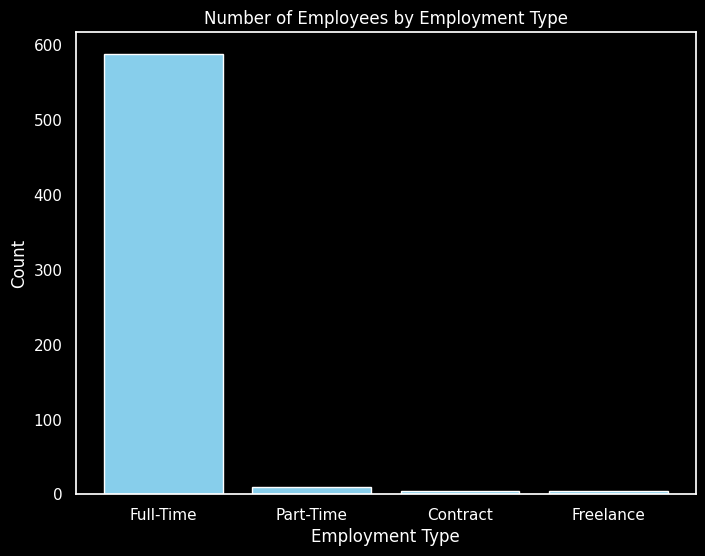

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'employment_type': ['Full-Time', 'Part-Time', 'Contract', 'Freelance'],
    'count': [588, 10, 5, 4]
}

# Create a DataFrame
emp_type = pd.DataFrame(data)

# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(emp_type ['employment_type'], emp_type ['count'], color='skyblue')

# Add labels and title
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Number of Employees by Employment Type')

# Show the plot
plt.show()

In [42]:
df['company_size'].replace({'L':'LARGE', 'S':'SMALL', 'M':'MEDIUM'}, inplace=True)
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020        Mid-level       Full-Time   
1           1       2020     Senior-level       Full-Time   
2           2       2020     Senior-level       Full-Time   
3           3       2020        Mid-level       Full-Time   
4           4       2020     Senior-level       Full-Time   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0            Germany             0          Germany        LARGE  
1              Japan             0            Japan        SMALL  
2     United Kingdom            50   United Kingdom       MEDIUM  
3           Honduras             0         Honduras        SMALL  
4      United States            50    United States        LARGE

In [43]:
import plotly.express as px

# Group by 'company_size', count occurrences, sort, and get top 10
grouped_df = df.groupby('company_size', as_index=False)['salary_in_usd'].count()
top_10_df = grouped_df.sort_values(by='salary_in_usd', ascending=False).head(10)

# Create the pie chart
fig = px.pie(
    top_10_df,
    names='company_size',
    values='salary_in_usd',
    color='company_size',
    hole=0.7,
    labels={'company_size': 'Company Size', 'salary_in_usd': 'Count'},
    template='ggplot2',
    title='<b>Company Sizes in Data Science Field</b>'
)

# Update layout for title and legend
fig.update_layout(
    title_x=0.5,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Show the plot
fig.show()

In [44]:
df_group = df.groupby('remote_ratio',as_index=False)['salary_in_usd'].count()
df_10 = df_group.sort_values(by='salary_in_usd', ascending=False).head(10)


In [45]:
import plotly.graph_objects as go

# Define the data
remote_ratio = [100, 0, 50]
salary_in_usd = [381, 127, 99]

# Create the bar plot with custom colors
fig = go.Figure([go.Bar(x=remote_ratio, y=salary_in_usd, marker=dict(color=['#636EFA', '#EF553B', '#00CC96']))])

# Add titles and labels
fig.update_layout(
    title='Salary by Remote Ratio',
    xaxis_title='Remote Ratio',
    yaxis_title='Salary in USD'
)

# Show the plot
fig.show()

In [46]:
import plotly.express as px

fig = px.strip(df,
                x='employment_type',
                y='salary_in_usd',
                labels={'salary_in_usd': 'Salary in USD', 'employment_type': 'Employment Type'},
                title="Salary Distribution by Employment Type",
                color='employment_type',
                color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the plot
fig.show()

In [47]:
import plotly.express as px

fig = px.strip(df,
                x='experience_level',
                y='salary_in_usd',
                color='experience_level',
                labels={'salary_in_usd': 'Salary in USD', 'experience_level': 'Experience Level'},
                title="Salary Distribution by Experience Level",
                color_discrete_sequence=px.colors.qualitative.Plotly)  # Choose a color sequence

# Show the plot
fig.show()

In [48]:
import plotly.express as px

fig = px.strip(df,
                x='company_size',
                y='salary_in_usd',
                color='company_size',
                labels={'salary_in_usd': 'Salary in USD', 'company_size': 'Company size'},
                title="Salary Distribution by Experience Level",
                color_discrete_sequence=px.colors.qualitative.Plotly)  # Choose a color sequence

# Show the plot
fig.show()

In [49]:
df.drop('Unnamed: 0', axis=1, inplace=True)


# 5 Correlation Analysis

In [50]:
import pandas as pd
import plotly.express as px


# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                labels={'x': 'Features', 'y': 'Features', 'color': 'Correlation'},
                color_continuous_scale=px.colors.sequential.Viridis)

# Update layout for better presentation
fig.update_layout(title='Correlation Heatmap',
                  title_x=0.5)

# Show the plot
fig.show()

#### In this analysis, no strong correlations were found between the features. This suggests that most variables have limited direct influence on each other.

##  6 - Feature Enginering

## 6.1 - Feature Enocoding

In [51]:
import pandas as pd

# Identify categorical columns
categorical_cols = ['experience_level', 'employment_type', 'job_title',
                    'salary_currency', 'employee_residence',
                    'company_location', 'company_size']

# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)

# Check the updated DataFrame
df_encoded.head()

work_year  salary  salary_in_usd  remote_ratio  \
0       2020   70000          79833             0   
1       2020  260000         260000             0   
2       2020   85000         109024            50   
3       2020   20000          20000             0   
4       2020  150000         150000            50   

   experience_level_Executive-level  experience_level_Mid-level  \
0                                 0                           1   
1                                 0                           0   
2                                 0                           0   
3                                 0                           1   
4                                 0                           0   

   experience_level_Senior-level  employment_type_Freelance  \
0                              0                          0   
1                              1                          0   
2                              1                          0   
3                              0                          0   
4                              1                          0   

   employment_type_Full-Time  employment_type_Part-Time  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   job_title_AI Scientist  job_title_Analytics Engineer  \
0                       0                             0   
1                       0                             0   
2                       0                             0   
3                       0                             0   
4                       0                             0   

   job_title_Applied Data Scientist  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   job_title_Applied Machine Learning Scientist  job_title_BI Data Analyst  \
0                                             0                          0   
1                                             0                          0   
2                                             0                          0   
3                                             0                          0   
4                                             0                          0   

   job_title_Big Data Architect  job_title_Big Data Engineer  \
0                             0                            0   
1                             0                            0   
2                             0                            1   
3                             0                            0   
4                             0                            0   

   job_title_Business Data Analyst  job_title_Cloud Data Engineer  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   job_title_Computer Vision Engineer  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   job_title_Computer Vision Software Engineer  job_title_Data Analyst  \
0                                            0                       0   
1                                            0                       0   
2                                            0                       0   
3                                            0                       0   
4                                            0                       0 

In [52]:
'''import pandas as pd

# Example: Assuming df is your original DataFrame
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)  # drop_first to avoid multicollinearity
'''

'import pandas as pd\n\n# Example: Assuming df is your original DataFrame\ndf_encoded = pd.get_dummies(df, drop_first=True, dtype=int)  # drop_first to avoid multicollinearity\n'

#### We applied one-hot encoding to categorical columns, converting them into binary format for use in modeling. This process transformed the `experience_level`, `employment_type`, `job_title`, `salary_currency`, `employee_residence`, `company_location`, and `company_size` columns, resulting in a model-ready DataFrame, `df_encoded`.

## 6.2 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale only the numeric features
scaled = scaler.fit_transform(df_encoded)

# Convert back to DataFrame if needed
scaled_df = pd.DataFrame(scaled, columns=df_encoded.columns)

In [ ]:
scaled_df

work_year    salary  salary_in_usd  remote_ratio  \
0    -2.032024 -0.164605      -0.457904     -1.743615   
1    -2.032024 -0.041475       2.083282     -1.743615   
2    -2.032024 -0.154885      -0.046177     -0.514377   
3    -2.032024 -0.197008      -1.301826     -1.743615   
4    -2.032024 -0.112761       0.531774     -0.514377   
..         ...       ...            ...           ...   
602   0.859977 -0.110169       0.588192      0.714862   
603   0.859977 -0.128314       0.193263      0.714862   
604   0.859977 -0.126370       0.235577     -1.743615   
605   0.859977 -0.112761       0.531774      0.714862   
606   0.859977 -0.080359       1.237005      0.714862   

     experience_level_Executive-level  experience_level_Mid-level  \
0                           -0.211543                    1.360061   
1                           -0.211543                   -0.735261   
2                           -0.211543                   -0.735261   
3                           -0.211543                    1.360061   
4                           -0.211543                   -0.735261   
..                                ...                         ...   
602                         -0.211543                   -0.735261   
603                         -0.211543                   -0.735261   
604                         -0.211543                   -0.735261   
605                         -0.211543                   -0.735261   
606                         -0.211543                    1.360061   

     experience_level_Senior-level  employment_type_Freelance  \
0                        -0.925348                  -0.081446   
1                         1.080674                  -0.081446   
2                         1.080674                  -0.081446   
3                        -0.925348                  -0.081446   
4                         1.080674                  -0.081446   
..                             ...                        ...   
602                       1.080674                  -0.081446   
603                       1.080674                  -0.081446   
604                       1.080674                  -0.081446   
605                       1.080674                  -0.081446   
606                      -0.925348                  -0.081446   

     employment_type_Full-Time  employment_type_Part-Time  \
0                     0.179758                  -0.129423   
1                     0.179758                  -0.129423   
2                     0.179758                  -0.129423   
3                     0.179758                  -0.129423   
4                     0.179758                  -0.129423   
..                         ...                        ...   
602                   0.179758                  -0.129423   
603                   0.179758                  -0.129423   
604                   0.179758                  -0.129423   
605                   0.179758                  -0.129423   
606                   0.179758                  -0.129423   

     job_title_AI Scientist  job_title_Analytics Engineer  \
0                 -0.108012                     -0.081446   
1                 -0.108012                     -0.081446   
2                 -0.108012                     -0.081446   
3                 -0.108012                     -0.081446   
4                 -0.108012                     -0.081446   
..                      ...                           ...   
602               -0.108012                     -0.081446   
603               -0.108012                     -0.081446   
604               -0.108012                     -0.081446   
605               -0.108012                     -0.081446   
606                9.258201                     -0.081446   

     job_title_Applied Data Scientist  \
0                           -0.091135   
1                           -0.091135   
2                           -0.091135   
3                           -0.091135   
4                           -0.091135  

#### We used `StandardScaler` to normalize the numerical features in the encoded DataFrame, ensuring each has a mean of 0 and a standard deviation of 1. This transformed data is stored in `scaled_df`.







In [ ]:
correlation = scaled_df.corr()['salary_in_usd'].sort_values()
correlation

salary_currency_EUR                -0.282797
salary_currency_INR                -0.257248
experience_level_Mid-level         -0.252024
employee_residence_India           -0.241131
company_location_India             -0.239575
                                      ...   
experience_level_Senior-level       0.343513
salary_currency_USD                 0.485953
company_location_United States      0.531643
employee_residence_United States    0.571803
salary_in_usd                       1.000000
Name: salary_in_usd, Length: 173, dtype: float64

#### that show correlation of 'salary_in_usd' with other features.

## Split Data

In [ ]:
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

In [ ]:
# Apply Linear Regression...
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(485, 172)

In [ ]:
y_train.shape

(485,)

# 7 - Modeling

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

## 7.1 - Linear

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 4724518726.550252
R² Score: -0.23272888469232278


##### For the `LinearRegression` model, we calculated a Mean Squared Error (MSE) of **4,724,518,726.55** and an R² Score of **-0.23** on the test set. These metrics provide insight into the model's predictive accuracy.

In [ ]:
importance = linear_model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
print(feature_importance.sort_values(by='Importance', ascending=False))

                                          Feature     Importance
22                  job_title_Data Analytics Lead  236318.111127
83              employee_residence_Czech Republic  210708.070557
64                            salary_currency_EUR  148827.405585
70                            salary_currency_PLN  144615.320936
12   job_title_Applied Machine Learning Scientist  143972.599428
..                                            ...            ...
125                       company_location_Brazil -159800.346170
120                    employee_residence_Vietnam -167130.979423
162                        company_location_Spain -183588.177631
152                  company_location_Netherlands -203247.631043
131               company_location_Czech Republic -320386.017519

[172 rows x 2 columns]


##### on the basis of linear regression how much each features is important.

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## Using KFold

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [ ]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 13 14] 404
Test index: [ 0  2  6  9 12 15 16 19 24 25] 203

Train index: [ 0  1  2  4  6  8  9 10 11 12] 405
Test index: [ 3  5  7 17 21 23 27 30 34 35] 202

Train index: [ 0  2  3  5  6  7  9 12 15 16] 405
Test index: [ 1  4  8 10 11 13 14 18 20 22] 202



## 7.2 - Lasso

In [ ]:
alphas = np.geomspace(4, 20, 20)

In [ ]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=10000)

    estimator = Pipeline([
        ("scaler", scaler),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)

    score = r2_score(y, predictions)

    scores.append(score)

In [ ]:
list(zip(alphas,scores))

[(4.0, 0.1693181240639885),
 (4.353593602921549, 0.17136650776514561),
 (4.7384443148498585, 0.1742422154166604),
 (5.157315214232582, 0.17659702428107926),
 (5.6132136312332355, 0.17952243429471249),
 (6.109412739192265, 0.18277945043423793),
 (6.649475054738714, 0.18632081429334624),
 (7.237278015274221, 0.19007879206697442),
 (7.877041817465654, 0.19401115716570017),
 (8.573359716616, 0.19794102065490338),
 (9.331231004451181, 0.20233090489869165),
 (10.156096902090468, 0.20625802013076933),
 (11.053879625898109, 0.2104961052942106),
 (12.03102490669371, 0.2150832283628059),
 (13.094548267592895, 0.21953849771117984),
 (14.252085392734966, 0.2235817504374381),
 (15.511946948525646, 0.22819157451954097),
 (16.88317825098993, 0.23300871780910293),
 (18.3756242076235, 0.2378960689266968),
 (20.0, 0.24319233011733976)]

In [ ]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-9.71591315e+03,  1.58932854e-02,  2.59185258e+01,  1.11925703e+05,
        2.62583381e+04,  4.63542206e+04, -1.13523810e+05, -7.60266728e+04,
       -8.51860799e+04,  7.51217895e+03, -1.47403448e+04,  7.43783667e+04,
        1.41805992e+05, -5.32500805e+04, -1.41786692e+03, -1.64947704e+04,
       -3.08494966e+04,  8.12582192e+04,  8.90585901e+03, -1.06710127e+04,
       -3.78794281e+04, -3.63661515e+03,  2.44866135e+05, -3.34911349e+04,
        2.68103815e+04, -8.47102735e+03, -2.12527713e+04,  5.29992871e+03,
       -6.04893640e+03,  6.62615703e+03,  0.00000000e+00, -0.00000000e+00,
        1.60470148e+04,  1.70071196e+04, -1.18281033e+04, -4.78645103e+04,
        1.46250816e+05,  4.36021783e+04, -3.51561459e+04, -9.70875439e+04,
       -2.39547265e+04,  4.66549965e+04,  2.84439348e+03, -0.00000000e+00,
        2.92562710e+04, -3.46717808e+03,  6.74318686e+03,  3.11672747e+04,
        7.07551001e+03,  3.31730931e+04, -3.96881491e+04, -2.60972522e+01,
       -9.82134158e+03,  

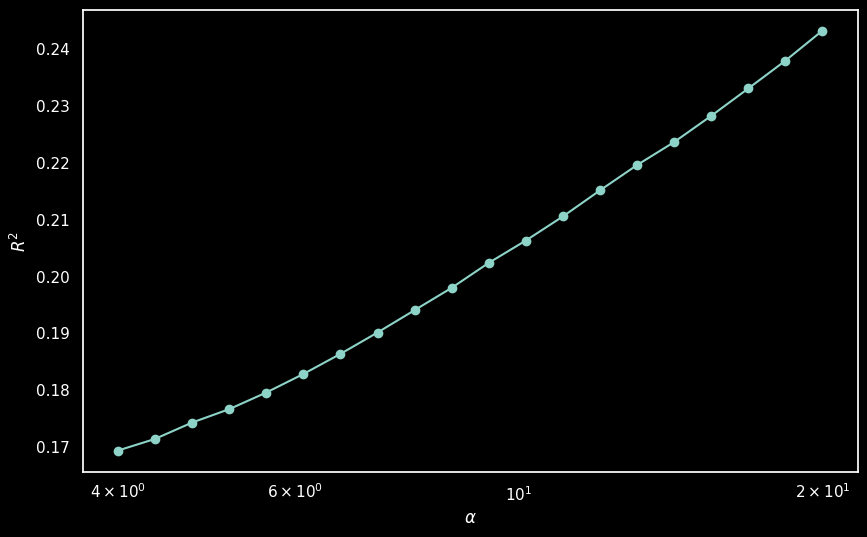

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

### Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1],
    'lasso_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ]),
                         'polynomial_features__degree': [1]})

In [ ]:
grid.best_params_

{'lasso_regression__alpha': 20.0, 'polynomial_features__degree': 1}

In [ ]:
y_predict = grid.predict(X)

In [ ]:
mse = mean_squared_error(y, y_predict)
r2 = r2_score(y, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1489170972.7600605
R² Score: 0.7037441311753393


#### Lasso Model Evaluation

For the `Lasso` model, optimized through `GridSearchCV`, we achieved a Mean Squared Error (MSE) of **1,489,170,972.76** and an R² Score of **0.70**. This performance suggests improved predictive accuracy compared to the baseline model.

In [ ]:
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['lasso_regression'].coef_

array([ 0.00000000e+00, -6.50889966e+03,  2.42711942e+04,  9.71449029e+02,
        2.25556570e+04,  1.22114211e+04,  2.27908460e+04, -8.93545542e+03,
       -1.30705929e+04, -1.03900335e+04,  6.87219871e+02, -1.19290990e+03,
        6.58542280e+03,  1.12476866e+04, -5.21116974e+03, -3.85744894e+01,
       -1.87489367e+03, -2.74973057e+03,  4.75649960e+03,  6.63555356e+02,
       -1.83870885e+02, -1.39057022e+04, -2.78101951e+02,  9.92941645e+03,
       -3.55644263e+03,  3.57175805e+03, -3.46059605e+03, -1.87739314e+03,
        5.29253842e+02, -3.89970218e+02,  9.06428094e+02,  0.00000000e+00,
       -0.00000000e+00,  9.32247950e+02,  1.80970770e+03, -6.63686672e+02,
       -1.94350858e+03,  8.35771842e+03,  3.91554551e+03, -2.83456685e+03,
       -3.92831908e+03, -1.65763423e+03,  4.52578595e+03,  2.17387571e+02,
        0.00000000e+00,  2.86108123e+03, -2.10901251e+02,  1.66052345e+03,
        2.18904740e+03,  3.18009459e+02,  3.73780809e+03, -7.98942497e+02,
       -9.49720161e+02, -

In [ ]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.069233      0.011457         0.005523        0.001226   
1        0.083019      0.006331         0.005469        0.000166   
2        0.073064      0.003953         0.005301        0.000117   
3        0.072936      0.001098         0.005401        0.000149   
4        0.070938      0.003899         0.005850        0.000939   
5        0.078087      0.007146         0.007379        0.003124   
6        0.071451      0.003448         0.005133        0.000140   
7        0.073709      0.003517         0.005623        0.000581   
8        0.069507      0.005333         0.004844        0.000278   
9        0.079153      0.010811         0.007339        0.002559   
10       0.073258      0.005316         0.005264        0.000073   
11       0.067327      0.004819         0.005011        0.000242   
12       0.061893      0.000553         0.005258        0.000089   
13       0.064335      0.003167         0.004648        0.000306   
14       0.067788      0.004107         0.005548        0.000159   
15       0.069488      0.003572         0.005303        0.000192   
16       0.068952      0.004177         0.005389        0.000133   
17       0.067762      0.003854         0.005678        0.000627   
18       0.074030      0.013169         0.005351        0.000093   
19       0.072215      0.002298         0.005490        0.000244   

    param_lasso_regression__alpha  param_polynomial_features__degree  \
0                        4.000000                                  1   
1                        4.353594                                  1   
2                        4.738444                                  1   
3                        5.157315                                  1   
4                        5.613214                                  1   
5                        6.109413                                  1   
6                        6.649475                                  1   
7                        7.237278                                  1   
8                        7.877042                                  1   
9                        8.573360                                  1   
10                       9.331231                                  1   
11                      10.156097                                  1   
12                      11.053880                                  1   
13                      12.031025                                  1   
14                      13.094548                                  1   
15                      14.252085                                  1   
16                      15.511947                                  1   
17                      16.883178                                  1   
18                      18.375624                                  1   
19                      20.000000                                  1   

                                               params  split0_test_score  \
0   {'lasso_regression__alpha': 4.0, 'polynomial_f...          -0.220733   
1   {'lasso_regression__alpha': 4.353593602921549,...          -0.199156   
2   {'lasso_regression__alpha': 4.7384443148498585...          -0.181468   
3   {'lasso_regression__alpha': 5.157315214232582,...          -0.164363   
4   {'lasso_regression__alpha': 5.6132136312332355...          -0.148365   
5   {'lasso_regression__alpha': 6.109412739192265,...          -0.132144   
6   {'lasso_regression__alpha': 6.649475054738714,...          -0.115308   
7   {'lasso_regression__alpha': 7.237278015274221,...          -0.098092   
8   {'lasso_regression__alpha': 7.877041817465654,...          -0.080470   
9   {'lasso_regression__alpha': 8.573359716616, 'p...          -0.062157   
10  {'lasso_regression__alpha': 9.331231004451181,...          -0.043576   
11  {'lasso_regression__alpha': 10.156096902090468...          -0.024828   
12  {'lasso_regression__alpha': 11.053879625898109...          -0.006453  

For lasso the output DataFrame from `pd.DataFrame(grid.cv_results_)` shows:

- **Timing Information**: Includes `mean_fit_time`, `std_fit_time`, `mean_score_time`, and `std_score_time`, which display the average and standard deviation of the fit and score times.
- **Parameters Tested**: Lists the parameter values tested, such as `param_lasso_regression__alpha` and `param_polynomial_features__degree`.
- **Performance Metrics**: Contains columns like `split_test_score` for each cross-validation split, along with `mean_test_score` and `std_test_score` for average and standard deviation scores.
- **Rank**: Shows `rank_test_score`, the rank of each parameter combination based on test performance.

This table enables easy comparison of model performance across different parameter combinations.

## 7.3 - Ridge

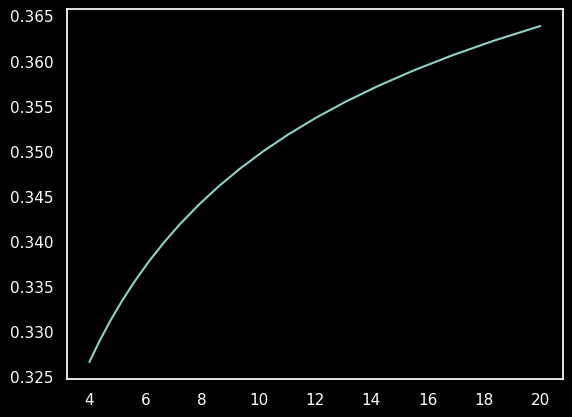

In [ ]:
pf = PolynomialFeatures(degree=1)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)

    estimator = Pipeline([
        ("scaler", scaler),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [ ]:
scores

[0.32659364754337095,
 0.328878351127763,
 0.3311365009641841,
 0.3333662572306234,
 0.3355655655871608,
 0.3377322507778482,
 0.33986411196716293,
 0.34195901661755546,
 0.3440149900805499,
 0.3460302985344529,
 0.34800352342351126,
 0.3499336260946012,
 0.35182000184135687,
 0.3536625230057938,
 0.35546157111377585,
 0.3572180582053286,
 0.3589334375527047,
 0.360609703846441,
 0.3622493826996176,
 0.36385550901649066]

### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1],
                         'ridge_regression__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [ ]:
grid.best_params_

{'polynomial_features__degree': 1, 'ridge_regression__alpha': 20.0}

In [ ]:
y_prediction = grid.predict(X)

In [ ]:
ms = mean_squared_error(y, y_prediction)
R2 = r2_score(y, y_prediction)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {R2}')

Mean Squared Error: 1489170972.7600605
R² Score: 0.6919703352819631


**Ridge Regression Results:**

- **Mean Squared Error (MSE)**: 1,489,170,972.76
- **R² Score**: 0.692

These metrics indicate the model’s performance, with a moderate R² score reflecting how well Ridge regression fits the data.

In [ ]:
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00, -4.68060871e+03,  1.08740010e+04,  7.49120250e+02,
        2.03570112e+04,  8.40739757e+03,  1.86775781e+04, -6.32594787e+03,
       -8.38195983e+03, -7.27811540e+03, -1.70101580e+01, -8.41559646e+02,
        5.74385892e+03,  8.02632592e+03, -4.28860879e+03,  9.61831568e+01,
       -1.91642186e+03, -2.13985381e+03,  4.44566800e+03, -3.14492266e+02,
        9.06206866e+02, -1.29929042e+04, -1.77545938e+02,  9.74816126e+03,
       -3.13166885e+03,  3.96980229e+03, -2.42655071e+03, -1.34974182e+03,
       -1.14366051e+02, -1.43319792e+02,  1.94659167e+03,  5.39917876e+02,
        1.25527096e+02,  1.17779227e+03,  2.52607256e+03, -3.77508357e+02,
       -1.80095009e+03,  8.04112509e+03,  4.13326394e+03, -2.30997121e+03,
       -2.37836358e+03, -1.48741968e+03,  3.81290740e+03,  8.39746844e+02,
        9.36228447e+01,  3.94998456e+03, -1.43936722e+02,  2.45866116e+03,
        2.66486281e+03,  5.05691024e+02,  3.96916089e+03,  3.52260139e+02,
       -1.92933881e+03, -

In [ ]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.058592      0.055412         0.005959        0.001580   
1        0.035933      0.024515         0.005670        0.000781   
2        0.016885      0.002096         0.004973        0.000201   
3        0.026572      0.008521         0.005053        0.000332   
4        0.017779      0.004263         0.004910        0.000095   
5        0.046476      0.022166         0.009115        0.000516   
6        0.025770      0.001219         0.010111        0.001777   
7        0.052536      0.036594         0.008752        0.001192   
8        0.025472      0.000088         0.008641        0.000150   
9        0.022212      0.003291         0.007514        0.001577   
10       0.014235      0.002649         0.005136        0.000300   
11       0.015928      0.001557         0.004947        0.000219   
12       0.045461      0.041309         0.005441        0.000623   
13       0.013819      0.002582         0.004841        0.000191   
14       0.018476      0.006011         0.006375        0.002358   
15       0.029819      0.002577         0.010770        0.001771   
16       0.029517      0.001915         0.009505        0.000345   
17       0.067554      0.043601         0.005954        0.001072   
18       0.018899      0.002975         0.004957        0.000145   
19       0.054159      0.036835         0.008398        0.000540   

    param_polynomial_features__degree  param_ridge_regression__alpha  \
0                                   1                       4.000000   
1                                   1                       4.353594   
2                                   1                       4.738444   
3                                   1                       5.157315   
4                                   1                       5.613214   
5                                   1                       6.109413   
6                                   1                       6.649475   
7                                   1                       7.237278   
8                                   1                       7.877042   
9                                   1                       8.573360   
10                                  1                       9.331231   
11                                  1                      10.156097   
12                                  1                      11.053880   
13                                  1                      12.031025   
14                                  1                      13.094548   
15                                  1                      14.252085   
16                                  1                      15.511947   
17                                  1                      16.883178   
18                                  1                      18.375624   
19                                  1                      20.000000   

                                               params  split0_test_score  \
0   {'polynomial_features__degree': 1, 'ridge_regr...           0.212790   
1   {'polynomial_features__degree': 1, 'ridge_regr...           0.214901   
2   {'polynomial_features__degree': 1, 'ridge_regr...           0.217052   
3   {'polynomial_features__degree': 1, 'ridge_regr...           0.219249   
4   {'polynomial_features__degree': 1, 'ridge_regr...           0.221495   
5   {'polynomial_features__degree': 1, 'ridge_regr...           0.223794   
6   {'polynomial_features__degree': 1, 'ridge_regr...           0.226148   
7   {'polynomial_features__degree': 1, 'ridge_regr...           0.228559   
8   {'polynomial_features__degree': 1, 'ridge_regr...           0.231027   
9   {'polynomial_features__degree': 1, 'ridge_regr...           0.233553   
10  {'polynomial_features__degree': 1, 'ridge_regr...           0.236137   
11  {'polynomial_features__degree': 1, 'ridge_regr...           0.238782   
12  {'polynomial_features__degree': 1, 'ridge_regr...           0.241487  

For Ridge the output DataFrame from `pd.DataFrame(grid.cv_results_)` shows the samw process as lasso:

- **Timing Information**: Includes `mean_fit_time`, `std_fit_time`, `mean_score_time`, and `std_score_time`, which display the average and standard deviation of the fit and score times.
- **Parameters Tested**: Lists the parameter values tested, such as `param_lasso_regression__alpha` and `param_polynomial_features__degree`.
- **Performance Metrics**: Contains columns like `split_test_score` for each cross-validation split, along with `mean_test_score` and `std_test_score` for average and standard deviation scores.
- **Rank**: Shows `rank_test_score`, the rank of each parameter combination based on test performance.

This table enables easy comparison of model performance across different parameter combinations.

## 7.4 - ElasticNet

In [ ]:
# Create the pipeline with ElasticNet
estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial_features", PolynomialFeatures()),
    ("elastic_net", ElasticNet())
])

# Define the parameter grid for ElasticNet
params = {
    'polynomial_features__degree': [1],
    'elastic_net__alpha': np.geomspace(0.01, 20, 20),  # regularization strength
    'elastic_net__l1_ratio': np.linspace(0, 1, 5)      # mix between L1 and L2 regularization
}

In [ ]:
# Perform GridSearchCV with k-fold cross-validation
grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
# Fit the grid search to your data
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('elastic_net', ElasticNet())]),
             param_grid={'elastic_net__alpha': array([1.00000000e-02, 1.49189556e-02, 2.22575236e-02, 3.32059005e-02,
       4.95397355e-02, 7.39081113e-02, 1.10263183e-01, 1.64501153e-01,
       2.45418539e-01, 3.66138828e-01, 5.46240892e-01, 8.14934360e-01,
       1.21579695e+00, 1.81384207e+00, 2.70606293e+00, 4.03716326e+00,
       6.02302593e+00, 8.98572564e+00, 1.34057642e+01, 2.00000000e+01]),
                         'elastic_net__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'polynomial_features__degree': [1]})

In [ ]:
grid.best_params_

{'elastic_net__alpha': 0.814934359552592,
 'elastic_net__l1_ratio': 0.0,
 'polynomial_features__degree': 1}

In [ ]:
y_predictt = grid.predict(X)

In [ ]:
mse = mean_squared_error(y, y_predictt)
r2 = r2_score(y, y_predictt)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 2110333203.404706
R² Score: 0.5801700354624597


#### Elastic Model Evaluation

Through `Elastic` model, `GridSearchCV`, we achieved a Mean Squared Error (MSE) of **2110333203** and an R² Score of **0.58**. This performance suggests improved predictive accuracy compared to the baseline model.

In [ ]:
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps["elastic_net"].coef_

array([    0.        ,   782.84044444,   950.64693702,   738.83521393,
        9623.15605614, -1050.84170785,  5635.94190494,  -637.31654237,
         274.89154996, -2118.06799177,  -584.97357987,  1277.33670671,
        3770.75075976,  2351.15245766, -2075.9286066 ,    29.76186971,
       -1370.52410083, -1009.02090749,  1183.84066072, -1549.44968799,
        -101.89922295, -7407.61123751, -1180.621434  ,  6374.74710259,
        -664.98263024,  2460.27959971, -1254.79435574,   -71.17509811,
       -1229.06804724, -1141.75135729,  2278.07577508,  -985.03874887,
           0.        ,  1187.15496273,  3717.50606016,  -215.28534079,
        -906.27766458,  4894.77735825,  2362.86807243,  -455.71560602,
        -432.02176906,  -714.78451098,  1680.57150583,  -418.64713695,
         -82.3342852 , -1158.11227143,  -139.39661704,   951.63871186,
         867.94085703,     0.        ,  3659.84079756,     0.        ,
       -1588.83300107,  -367.8046881 ,  7287.45922298,  5854.05631213,
      

In [ ]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.086916      0.020655         0.008066        0.001822   
1        0.106528      0.028421         0.007679        0.003390   
2        0.124757      0.002639         0.010073        0.000414   
3        0.082831      0.023794         0.008843        0.002664   
4        0.082078      0.012221         0.013551        0.001928   
..            ...           ...              ...             ...   
95       0.106478      0.024201         0.006721        0.002440   
96       0.011536      0.000185         0.004632        0.000091   
97       0.011047      0.000169         0.004647        0.000112   
98       0.011490      0.000081         0.004663        0.000124   
99       0.060018      0.004616         0.005456        0.000168   

    param_elastic_net__alpha  param_elastic_net__l1_ratio  \
0                       0.01                         0.00   
1                       0.01                         0.25   
2                       0.01                         0.50   
3                       0.01                         0.75   
4                       0.01                         1.00   
..                       ...                          ...   
95                     20.00                         0.00   
96                     20.00                         0.25   
97                     20.00                         0.50   
98                     20.00                         0.75   
99                     20.00                         1.00   

    param_polynomial_features__degree  \
0                                   1   
1                                   1   
2                                   1   
3                                   1   
4                                   1   
..                                ...   
95                                  1   
96                                  1   
97                                  1   
98                                  1   
99                                  1   

                                               params  split0_test_score  \
0   {'elastic_net__alpha': 0.01, 'elastic_net__l1_...           0.382441   
1   {'elastic_net__alpha': 0.01, 'elastic_net__l1_...           0.376283   
2   {'elastic_net__alpha': 0.01, 'elastic_net__l1_...           0.367459   
3   {'elastic_net__alpha': 0.01, 'elastic_net__l1_...           0.350812   
4   {'elastic_net__alpha': 0.01, 'elastic_net__l1_...           0.092520   
..                                                ...                ...   
95  {'elastic_net__alpha': 20.0, 'elastic_net__l1_...           0.118444   
96  {'elastic_net__alpha': 20.0, 'elastic_net__l1_...           0.149875   
97  {'elastic_net__alpha': 20.0, 'elastic_net__l1_...           0.199756   
98  {'elastic_net__alpha': 20.0, 'elastic_net__l1_...           0.291055   
99  {'elastic_net__alpha': 20.0, 'elastic_net__l1_...           0.321069   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.346326          -0.200598         0.176056        0.266742   
1            0.341664          -0.241617         0.158777        0.283474   
2            0.334443          -0.295137         0.135588        0.304867   
3            0.319258          -0.371693         0.099459        0.333403   
4            0.246208          -0.603248        -0.088173        0.369578   
..                ...                ...              ...             ...   
95           0.100201           0.052789         0.090478        0.027671   
96           0.128058           0.087473         0.121802        0.025856   
97           0.171978           0.140348         0.170694        0.024270   
98           0.250735           0.228332         0.256707        0.025952   
99           0.296202          -0.392884         0.074795        0.330855   

    rank_test_score  
0                68  
1                72  
2                75  
3                79  
4            

##### same as lasso and ridge these features show output for ElasticNet

## 7.5 - KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Estimate KNN model for regression
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', round(mse, 2))
print('R² Score: ', round(r2, 2))

Mean Squared Error:  1280260407.22
R² Score:  0.67


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Try K from 1 to 50
max_k = 50

# Create empty lists to store MSE and R² for each k
r2_scores = []
mse_values = []

for k in range(1, max_k + 1):
    # Create a KNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)

    # Train the regressor
    knn.fit(X_train, y_train.values.ravel())

    # Make predictions
    preds = knn.predict(X_test)

    # Evaluate the regressor with MSE and R²
    mse_value = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # Store the results
    r2_scores.append((k, round(r2, 4)))
    mse_values.append((k, round(mse_value, 4)))

# Convert the results lists to dataframes
r2_results = pd.DataFrame(r2_scores, columns=['K', 'R2 Score'])
mse_results = pd.DataFrame(mse_values, columns=['K', 'MSE'])

# Display the results dataframe
r2_results

K  R2 Score
0    1    0.5064
1    2    0.5250
2    3    0.6660
3    4    0.6415
4    5    0.6744
5    6    0.6118
6    7    0.6760
7    8    0.7383
8    9    0.7286
9   10    0.7113
10  11    0.6682
11  12    0.6630
12  13    0.6633
13  14    0.6682
14  15    0.6623
15  16    0.6585
16  17    0.6521
17  18    0.6547
18  19    0.6534
19  20    0.6477
20  21    0.6440
21  22    0.6404
22  23    0.6330
23  24    0.6272
24  25    0.6254
25  26    0.6156
26  27    0.6141
27  28    0.6127
28  29    0.6036
29  30    0.5966
30  31    0.5942
31  32    0.5917
32  33    0.5861
33  34    0.5819
34  35    0.5822
35  36    0.5749
36  37    0.5682
37  38    0.5650
38  39    0.5656
39  40    0.5609
40  41    0.5565
41  42    0.5579
42  43    0.5534
43  44    0.5495
44  45    0.5468
45  46    0.5433
46  47    0.5393
47  48    0.5353
48  49    0.5343
49  50    0.5306

In [ ]:
mse_results

K           MSE
0    1  1.891947e+09
1    2  1.820573e+09
2    3  1.280260e+09
3    4  1.374031e+09
4    5  1.247719e+09
5    6  1.487649e+09
6    7  1.241744e+09
7    8  1.003044e+09
8    9  1.040196e+09
9   10  1.106585e+09
10  11  1.271782e+09
11  12  1.291767e+09
12  13  1.290463e+09
13  14  1.271574e+09
14  15  1.294276e+09
15  16  1.308925e+09
16  17  1.333411e+09
17  18  1.323326e+09
18  19  1.328494e+09
19  20  1.350288e+09
20  21  1.364245e+09
21  22  1.378302e+09
22  23  1.406456e+09
23  24  1.428631e+09
24  25  1.435583e+09
25  26  1.473422e+09
26  27  1.479065e+09
27  28  1.484404e+09
28  29  1.519294e+09
29  30  1.546232e+09
30  31  1.555289e+09
31  32  1.565014e+09
32  33  1.586261e+09
33  34  1.602231e+09
34  35  1.601250e+09
35  36  1.629415e+09
36  37  1.654896e+09
37  38  1.667200e+09
38  39  1.665038e+09
39  40  1.682880e+09
40  41  1.699609e+09
41  42  1.694552e+09
42  43  1.711636e+09
43  44  1.726597e+09
44  45  1.736853e+09
45  46  1.750303e+09
46  47  1.765699e+09
47  48  1.781127e+09
48  49  1.784782e+09
49  50  1.799019e+09

Using the **K-Nearest Neighbors (KNN) algorithm**, the **F1 Score** varies across different values of K, starting at **0.5064** for K=1, gradually changing with larger K values, and for k=8, reaching **0.7383** highest r2_score with rms =1.003044e+09 . This trend suggests a slight performance decline as the K value changing.

<Figure size 1920x1440 with 0 Axes>

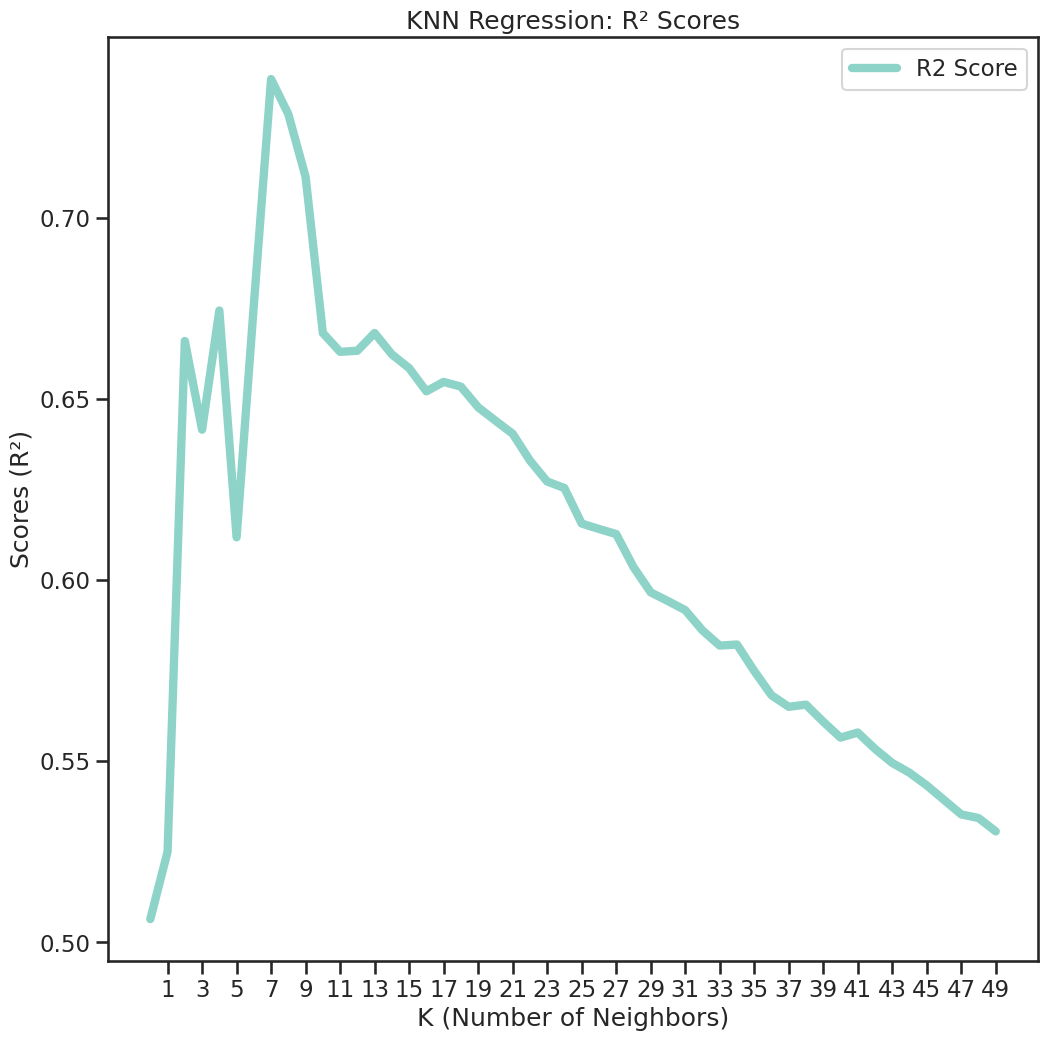

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visual style for the plot
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)

# Plot R² scores from r2_results
ax = r2_results[['R2 Score']].plot(figsize=(12, 12), linewidth=6)

# Set labels and title for the plot
ax.set(xlabel='K (Number of Neighbors)', ylabel='Scores (R²)')
ax.set_xticks(range(1, max_k, 2))  # Setting x-axis ticks for every second value of K
plt.title('KNN Regression: R² Scores')

# Save the plot as an image file
plt.savefig('knn_mse_r2.png')

# Display the plot
plt.show()

<Figure size 1920x1440 with 0 Axes>

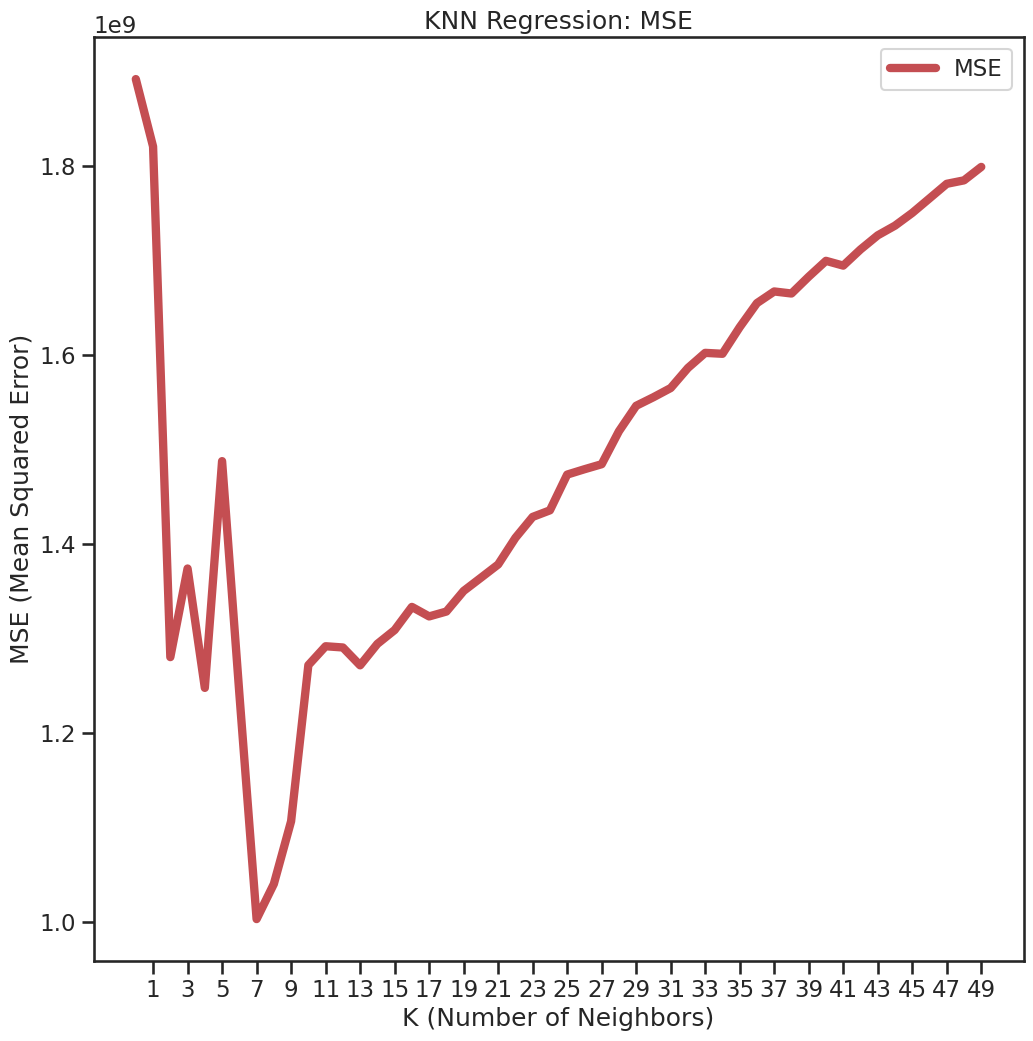

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visual style for the plot
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)

# Plot MSE from error_results
ax = mse_results[['MSE']].plot(figsize=(12, 12), linewidth=6, color='r')

# Set labels and title for the plot
ax.set(xlabel='K (Number of Neighbors)', ylabel='MSE (Mean Squared Error)')
ax.set_xticks(range(1, max_k, 2))  # Setting x-axis ticks for every second value of K
plt.title('KNN Regression: MSE')

# Save the plot as an image file
plt.savefig('knn_mse.png')

# Display the plot
plt.show()

## 7.6 - SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [ ]:
model = SVC()

In [ ]:
# Define a GridSearchCV to search the best parameters, scoring based on R²
grid_search = GridSearchCV(estimator=model,
                           param_grid=params_grid,
                           scoring='r2',  # You can use 'neg_mean_squared_error' for MSE
                           cv=5,          # 5-fold cross-validation
                           verbose=1)


In [ ]:
# Search for the best parameters with the training data
grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_params

{'C': 100, 'kernel': 'rbf'}

In [ ]:
model = SVC(C=100, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test,preds)
msee = mean_squared_error(y_test,preds)

print('score',r2)
print('mean_square_error',msee)

score 0.827503971218092
mean_square_error 661102962.9918033


**Support Vector Machine (SVM) Results:**

- **Mean Squared Error (MSE)**: 661,102,962.99
- **R² Score**: 0.828

These results reflect a relatively high R² score, indicating that the SVM model effectively captures patterns in the datathrough GridSearchCV.

## 7.7 - RandomForest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define a more extensive parameter grid for Random Forest
rf_param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 13, 17],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=4,  # More folds for better estimation
    verbose=1,
    n_iter=30,  # Increase number of combinations to try
    random_state=42
)

In [ ]:
# Fit the random search
rf_random_search.fit(X_train, y_train.values.ravel())

Fitting 4 folds for each of 30 candidates, totalling 120 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 13, 17],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:

# Get the best parameters and evaluate
best_rf_params = rf_random_search.best_params_
print("Best Random Forest hyperparameters:", best_rf_params)

# Predict using the best model
best_rf_model = rf_random_search.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Mean Squared Error (MSE) - Random Forest: {mse_rf}")
print(f"R² Score - Random Forest: {r2_rf}")

Best Random Forest hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}
Mean Squared Error (MSE) - Random Forest: 669979845.0683709
R² Score - Random Forest: 0.8251878011328095


**Mean Squared Error (MSE)**: 669,979,845.07
- **R² Score**: 0.825

The selected hyperparameters result in a strong R² score, showing good predictive performance for the Random Forest model.

In [ ]:
from sklearn.tree import plot_tree

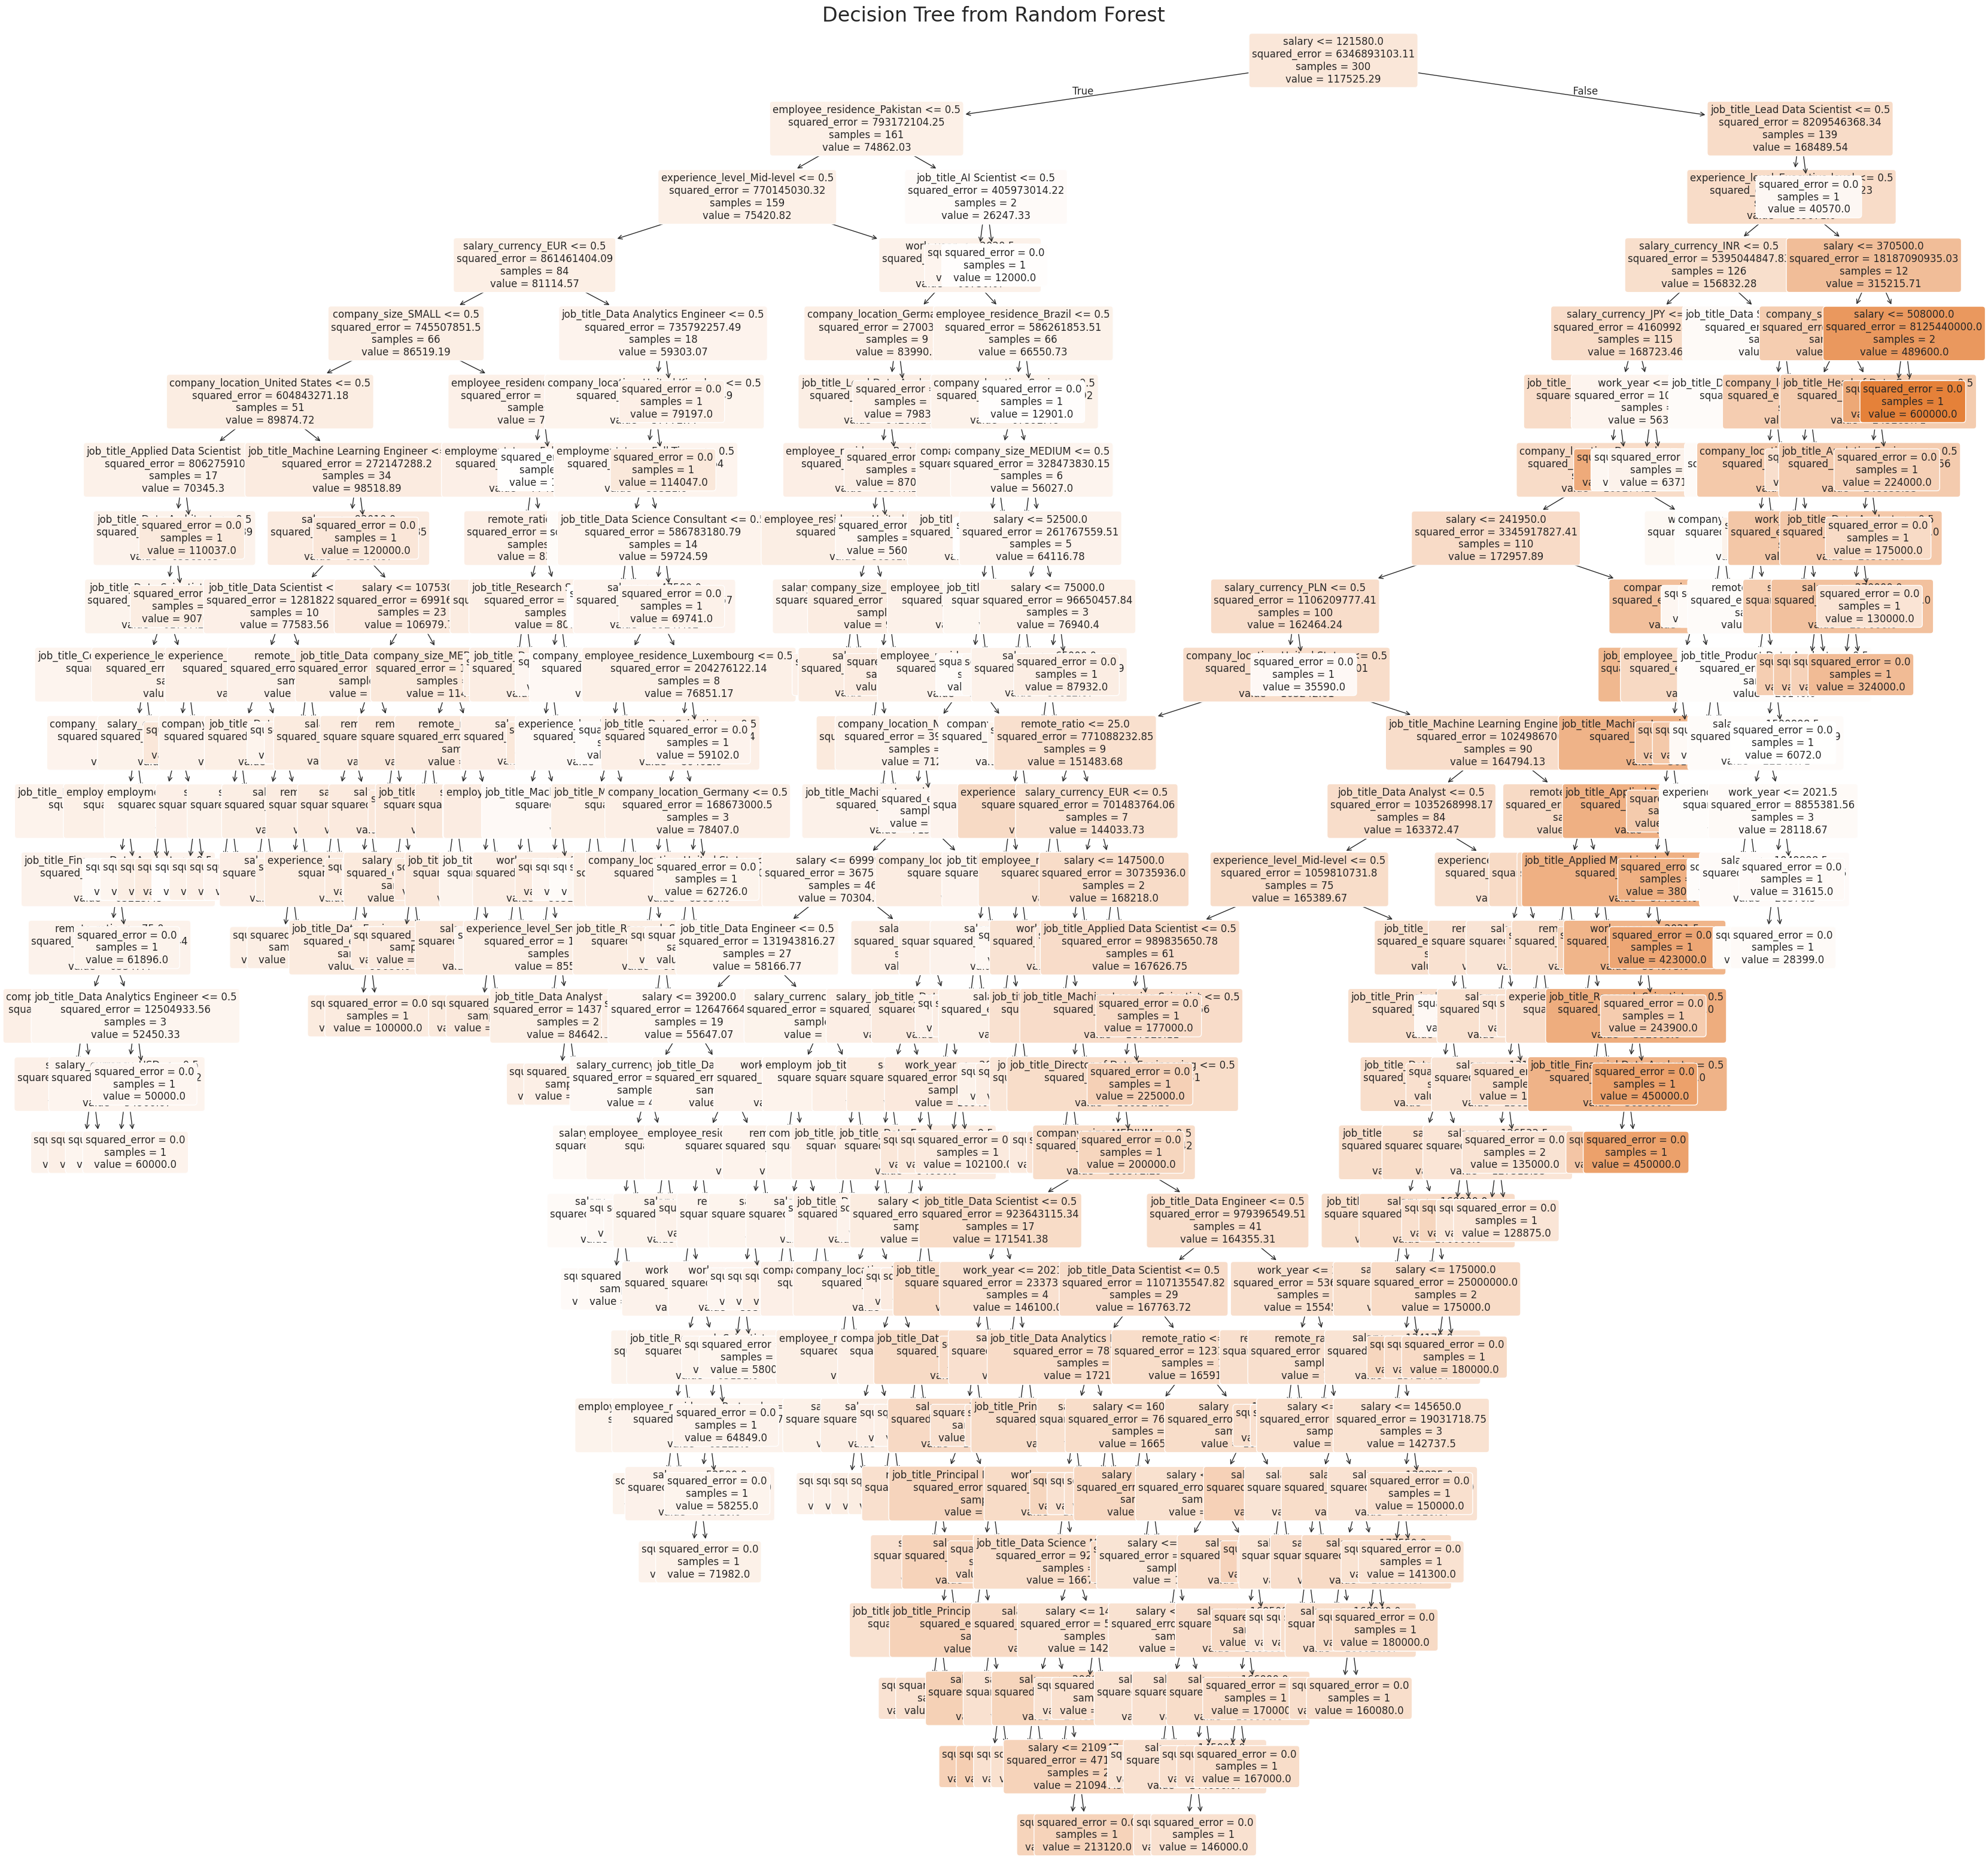

In [ ]:
# Plot one of the trees from the Random Forest
plt.figure(figsize=(40, 40))  # Adjust figure size
plot_tree(
    best_rf_model.estimators_[0],
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=12,  # Adjust font size for readability
    precision=2   # Set precision for numerical values
)
plt.title("Decision Tree from Random Forest", fontsize=24)  # Title font size
plt.axis('off')  # Turn off the axis
plt.show()

# 8 -  Conclusion

In [ ]:
dictt = {
    "model": ["linear", "lasso", "ridge", "Elastic", "KNN", "SVM", "Random_Forest"],
    "score": [-0.2327, 0.7037, 0.6917, 0.5801, 0.7383, 0.8275, 0.8251],
    "Mse": [4724, 1489, 1479, 2110, 1003, 661, 669]
}

In [ ]:
conclusion =pd.DataFrame(dictt)
conclusion

model   score   Mse
0         linear -0.2327  4724
1          lasso  0.7037  1489
2          ridge  0.6917  1479
3        Elastic  0.5801  2110
4            KNN  0.7383  1003
5            SVM  0.8275   661
6  Random_Forest  0.8251   669

Based on the model evaluations:

- **Support Vector Machine (SVM)** achieved the best performance with an **R² Score of 0.827** and a **Mean Squared Error (MSE) of 661**.
- **Random Forest** closely followed with an **R² Score of 0.825** and **MSE of 669**.
  
These metrics indicate that **SVM is the most suitable model for this data**, as it has the highest R² Score and one of the lowest MSEs, making it the best choice for accurate predictions.

> Note: RMSE values for each model were not written in full. You can check each model's specific RMSE in its corresponding section above.

# 9 - Next Step

- **Hyperparameter Tuning**: Further fine-tune the best-performing models (SVM and Random Forest) to see if performance can be improved.
- **Feature Engineering**: Explore additional feature transformations or interactions that might enhance the model’s predictive power.

# 10 - Key Insight

- **Model Selection**: SVM and Random Forest emerged as the top-performing models, with both achieving high R² scores and low MSE.
- **Data Preprocessing**: Effective feature encoding and scaling contributed significantly to model performance.
- **Variance in Performance**: Different regression models exhibit substantial performance variability, highlighting the need for thorough model evaluation.

# 11 - Suggestion

- **Try Ensemble Methods**: Consider stacking or blending models to leverage the strengths of multiple algorithms.
- **Adjust Features**: Add polynomial features or feature combinations to capture more complex relationships within the data.
- **Consider Alternative Metrics**: While R² and MSE are helpful, other metrics like MAE may provide additional insights into model accuracy.